# Import liberaries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns


# Data Exploration

In [54]:
# Load the dataset
data = pd.read_csv('F:\collage\DM\housing.csv')


In [55]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20629 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Data Preparation

In [57]:
# checking for null values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity        11
dtype: int64

In [58]:
# drop it
data['total_bedrooms'].fillna(data['total_bedrooms'].mean() , inplace=True)

In [59]:

imputer = SimpleImputer(strategy='most_frequent')
data['ocean_proximity'] = imputer.fit_transform(data[['ocean_proximity']])

In [60]:
# checking again
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

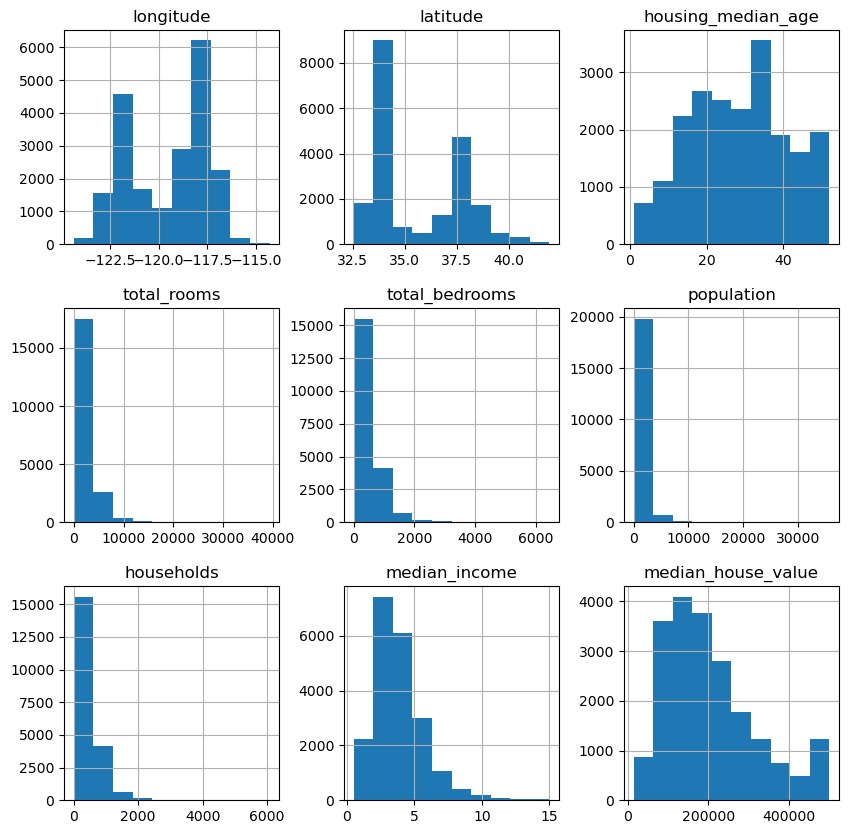

In [61]:
# check the distribution of the data
data.hist(figsize=(10, 10))

<AxesSubplot:>

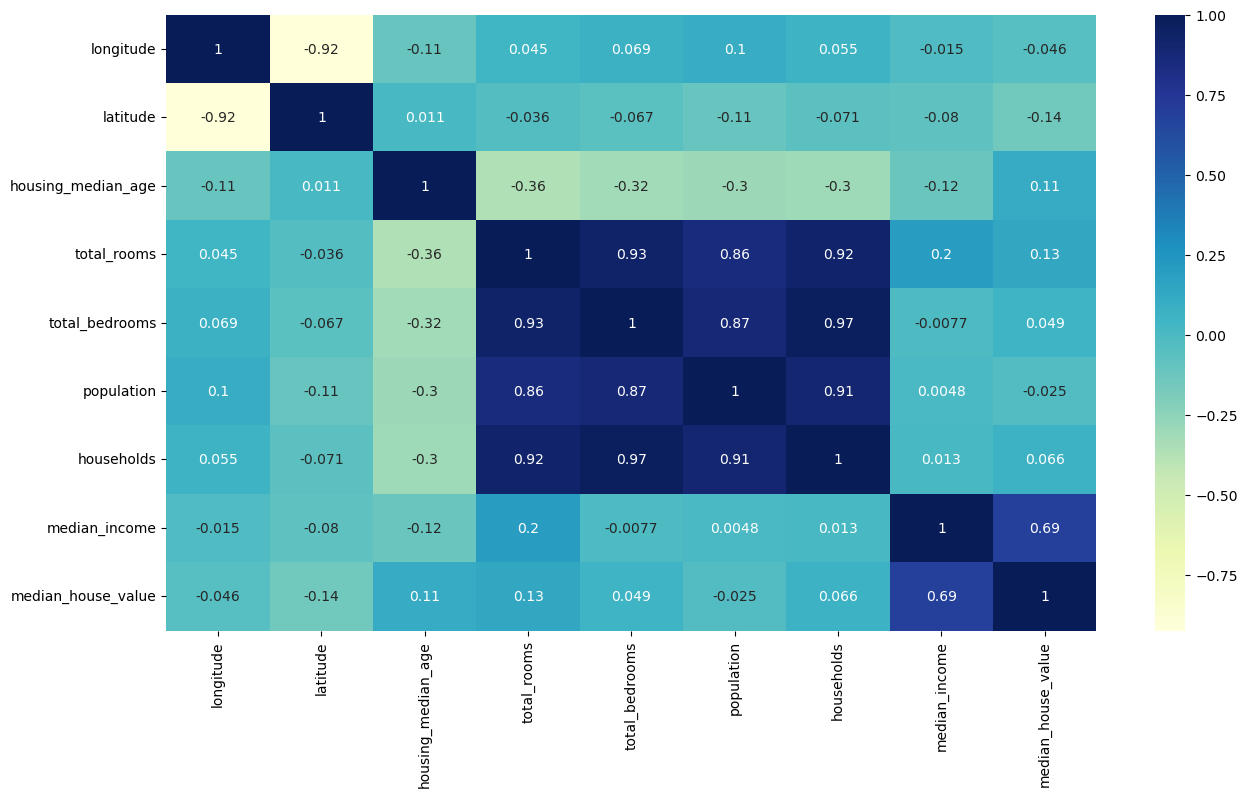

In [62]:
# check the correlation
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [63]:
# from the histograms total_rooms , total_bedrooms ,population ,households are right skewed 
#data normalization
data["total_rooms"] = np.log(data['total_rooms']+1)
data["total_bedrooms"] = np.log(data['total_bedrooms']+1)
data["population"] = np.log(data['population']+1)
data["households"] = np.log(data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

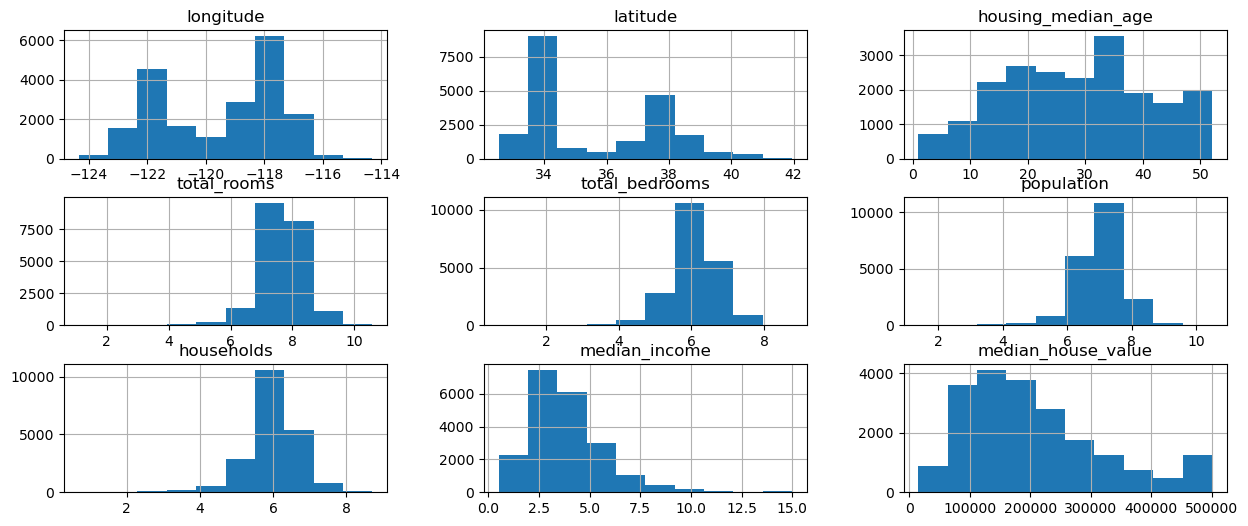

In [64]:
# checking the distribution again
data.hist(figsize=(15, 6))

## encoding

In [65]:
data = data.join(pd.get_dummies(data["ocean_proximity"])).drop(['ocean_proximity'], axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,3.8462,342200,0,0,0,1,0


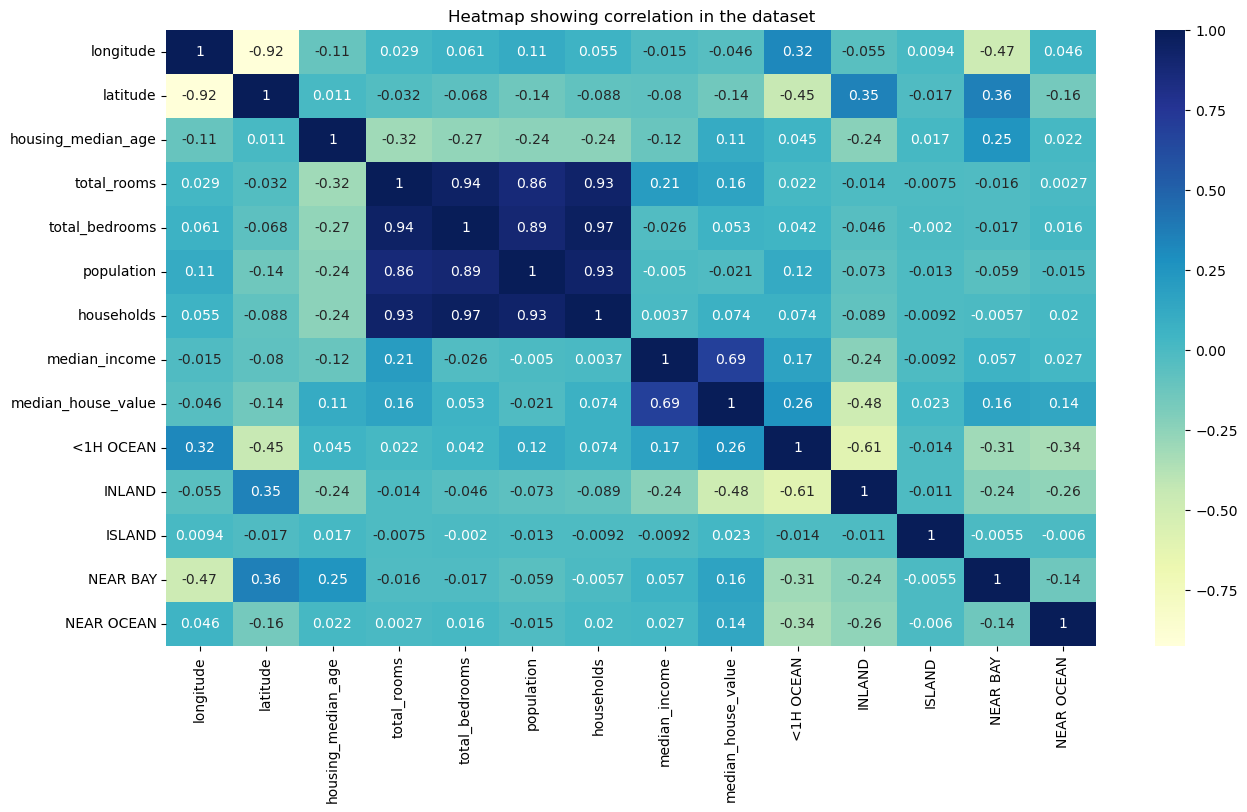

In [66]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Heatmap showing correlation in the dataset')
plt.show()


### feature engineering

In [67]:
data.loc[:, "bedroom_ratio"] = data.loc[:, "total_bedrooms"]  / data.loc[:, "total_rooms"]   

Text(0.5, 1.0, 'Heatmap showing correlation in the dataset')

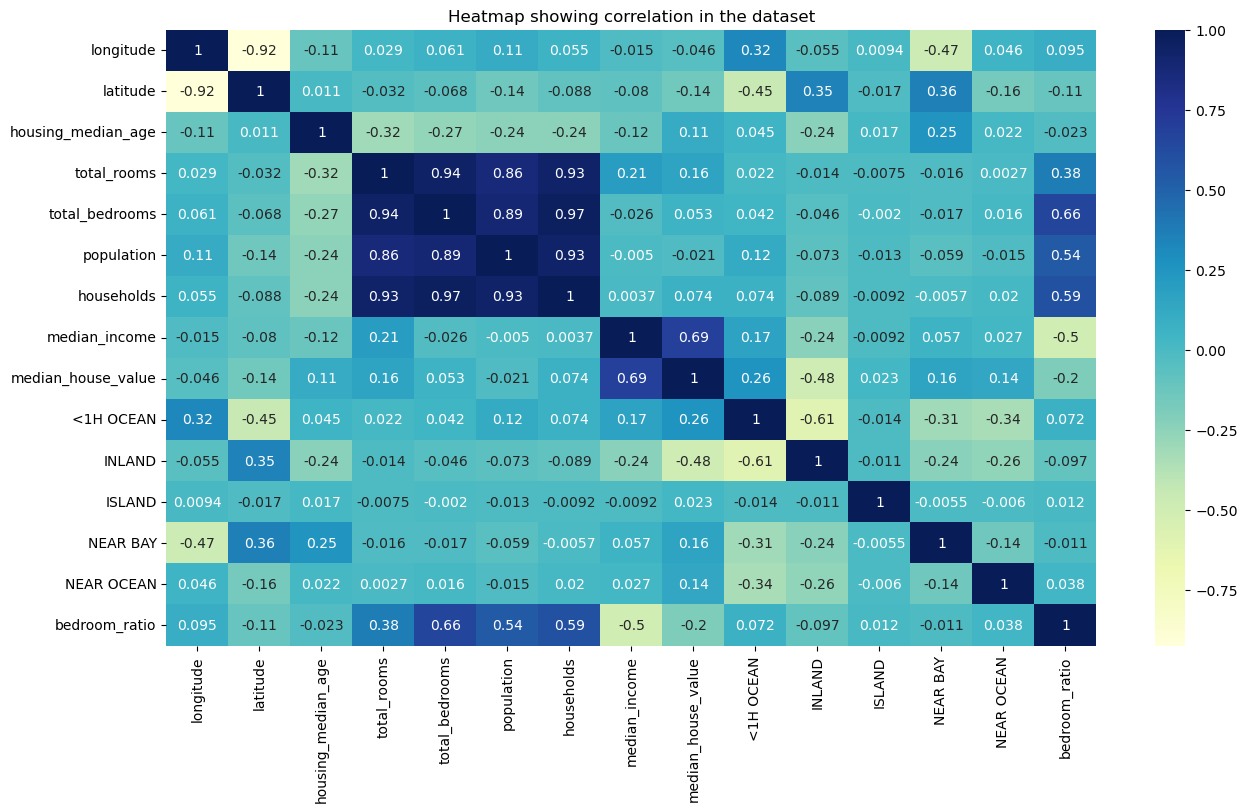

In [68]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title('Heatmap showing correlation in the dataset')


# Splitting The Data

In [69]:
X = data.drop(['median_house_value'], axis=1)
y = data.loc[:, 'median_house_value']


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13828, 14)
(13828,)
(6812, 14)
(6812,)


# Data Scaling

### RobustScaler

In [71]:
scaler = RobustScaler()
X_train_rob = scaler.fit_transform(X_train)
X_test_rob = scaler.transform(X_test)

Text(0.5, 1.0, 'Heatmap showing correlation in the dataset after scaling')

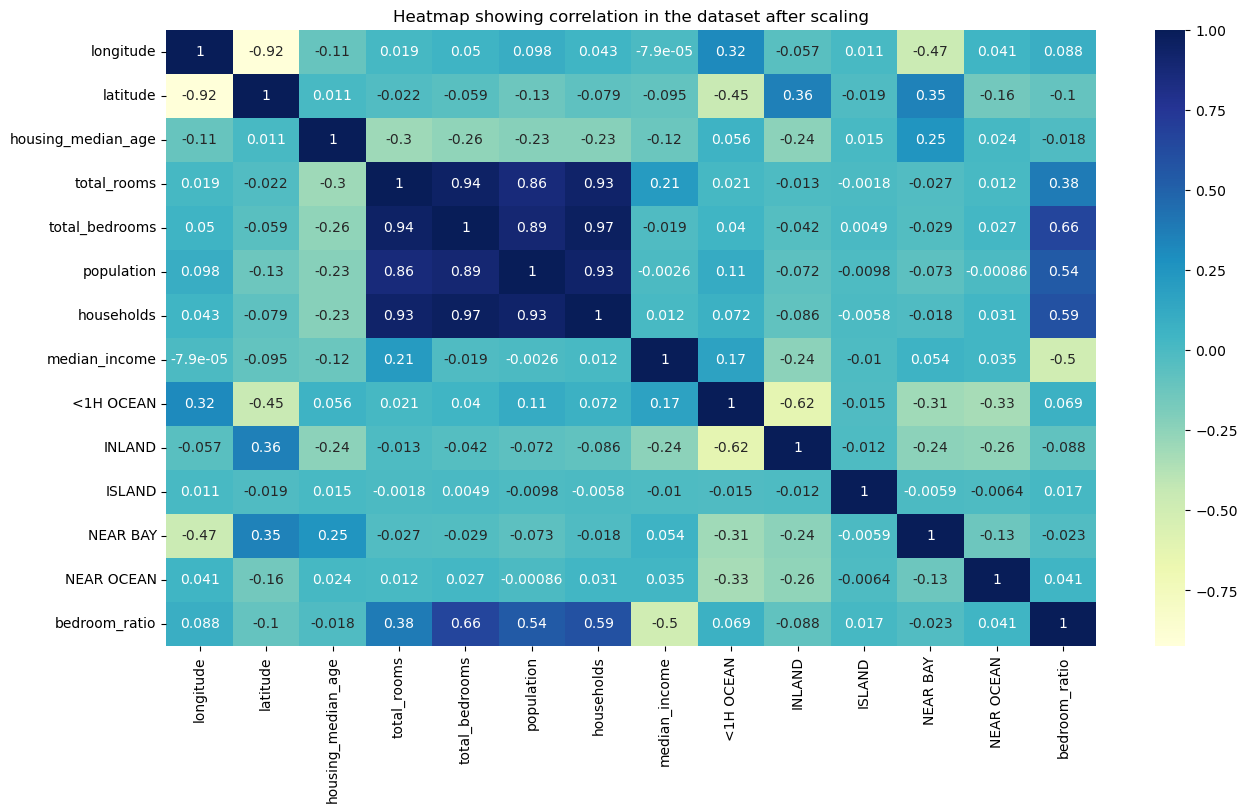

In [72]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(X_test_rob ,columns=X.columns).corr(), annot=True, cmap="YlGnBu")
plt.title('Heatmap showing correlation in the dataset after scaling')

### MinMaxScaler

In [73]:

scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)

Text(0.5, 1.0, 'Heatmap showing correlation in the dataset after scaling')

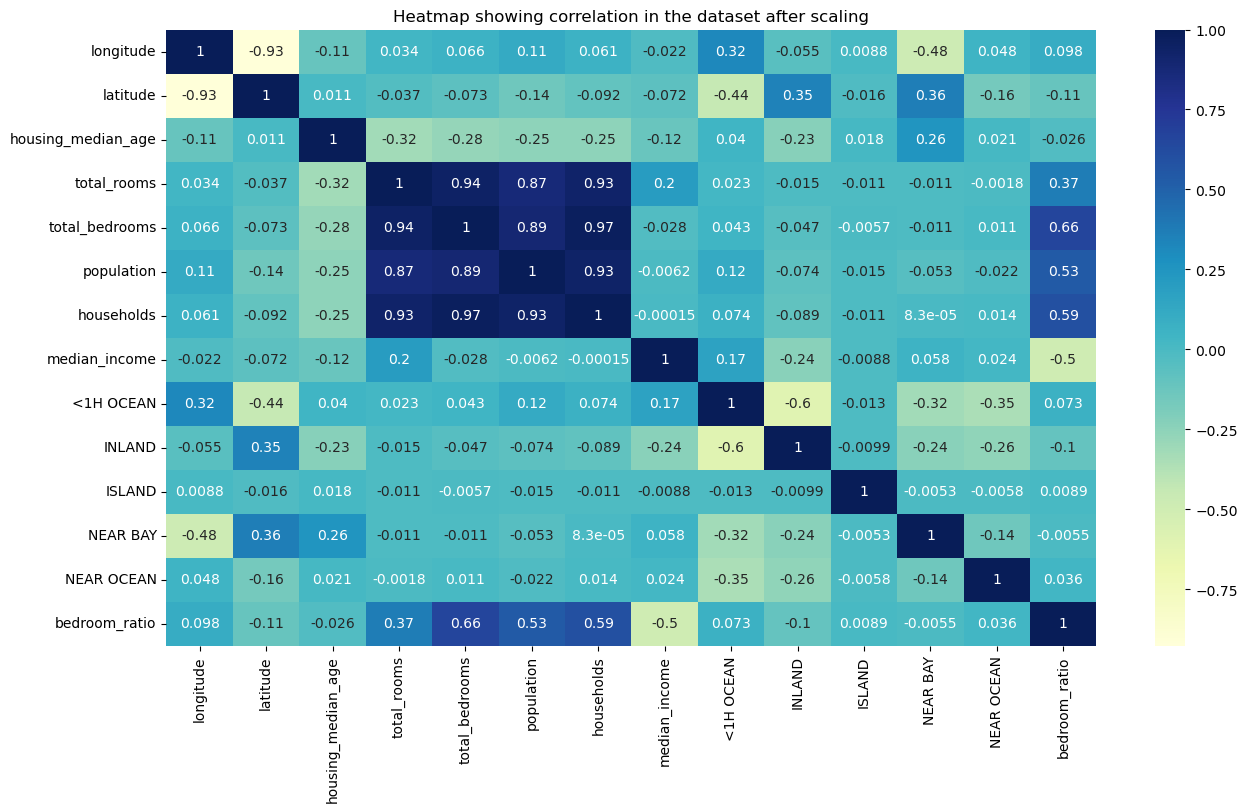

In [74]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.DataFrame(X_train_mm ,columns=X.columns).corr(), annot=True, cmap="YlGnBu")
plt.title('Heatmap showing correlation in the dataset after scaling')


# LinearRegression

In [75]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()



### with robust

In [76]:
linreg.fit(X_train_rob, y_train)

LinearRegression()

In [77]:
linreg.predict(X_test_rob)

array([226245.74023654, 157859.90839418, 181629.70644541, ...,
       286527.09976169,  67613.74525701,  93191.34386997])

In [78]:
r2 = r2_score(y_test,linreg.predict(X_test_rob) )
mse = mean_squared_error(y_test, linreg.predict(X_test_rob))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, linreg.predict(X_test_rob))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score (r2): {r2:.2f}")

Root Mean Squared Error (RMSE): 64755.16
Mean Absolute Error (MAE): 47350.68
R2 Score (r2): 0.68


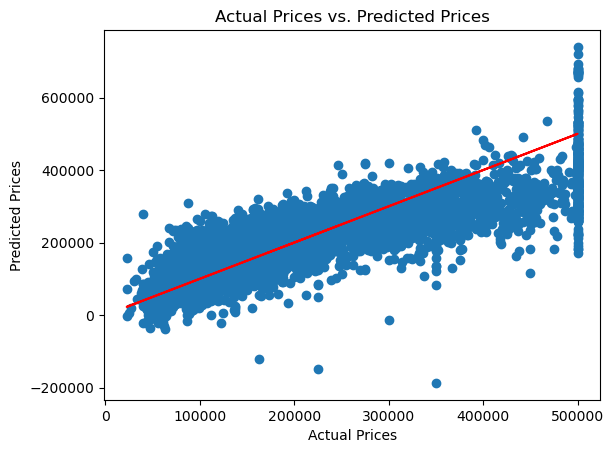

In [79]:
# visulization

plt.scatter(y_test, linreg.predict(X_test_rob))
plt.plot(y_test, y_test, 'red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

### with StandardScaler

In [80]:
scaler = StandardScaler()
X_train_ss = scaler.fit_transform(X_train)
X_test_ss = scaler.transform(X_test)

In [81]:
linreg.fit(X_train_ss, y_train)

LinearRegression()

In [82]:
linreg.score(X_test_ss, y_test)

0.6812483877126119

In [83]:
r2 = r2_score(y_test,linreg.predict(X_test_ss) )
mse = mean_squared_error(y_test, linreg.predict(X_test_ss))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, linreg.predict(X_test_ss))

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score (r2): {r2:.2f}")

Root Mean Squared Error (RMSE): 64763.14
Mean Absolute Error (MAE): 47329.57
R2 Score (r2): 0.68


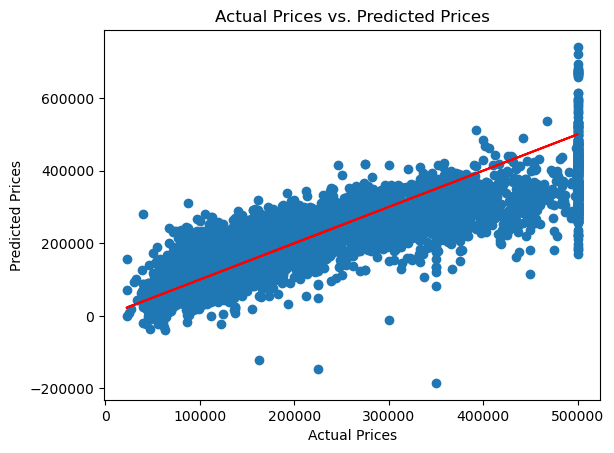

In [84]:
# visulization

plt.scatter(y_test, linreg.predict(X_test_ss))
plt.plot(y_test, y_test, 'red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# RandomForestRegressor


In [85]:
from sklearn.ensemble import RandomForestRegressor
rf  = RandomForestRegressor()


### with robust

In [86]:
rf.fit(X_train_rob,y_train)

RandomForestRegressor()

In [87]:
rf.score(X_test_rob,y_test)

0.8220630740443255

In [88]:
mse = mean_squared_error(y_test, rf.predict(X_test_rob))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf.predict(X_test_rob))
r2 = r2_score(y_test,rf.predict(X_test_rob) )


print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score (r2): {r2:.2f}")

Root Mean Squared Error (RMSE): 48387.67
Mean Absolute Error (MAE): 32111.93
R2 Score (r2): 0.82


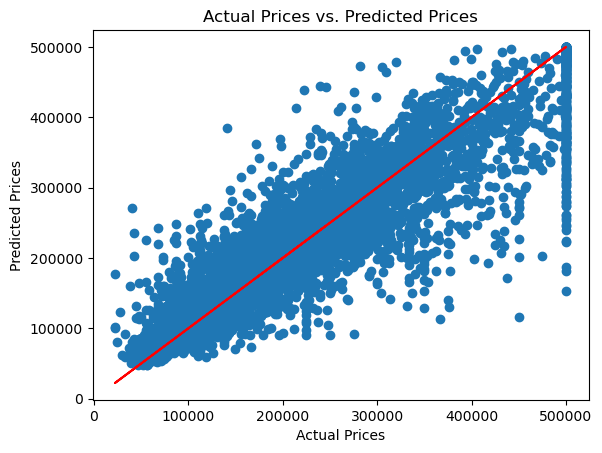

In [89]:
# visulization
plt.scatter(y_test, rf.predict(X_test_rob))
plt.plot(y_test, y_test, 'red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

### with StandardScaler

In [90]:
rf.fit(X_train_ss,y_train)

RandomForestRegressor()

In [91]:
rf.predict(X_test_ss)

array([212409.01, 177954.02, 123907.  , ..., 361544.05,  82889.  ,
       148294.01])

In [92]:
rf.score(X_test_ss,y_test)

0.8204855813043694

In [93]:
mse = mean_squared_error(y_test, rf.predict(X_test_ss))
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rf.predict(X_test_ss))
r2 = r2_score(y_test,rf.predict(X_test_ss) )


print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R2 Score (r2): {r2:.2f}")

Root Mean Squared Error (RMSE): 48601.69
Mean Absolute Error (MAE): 32208.63
R2 Score (r2): 0.82


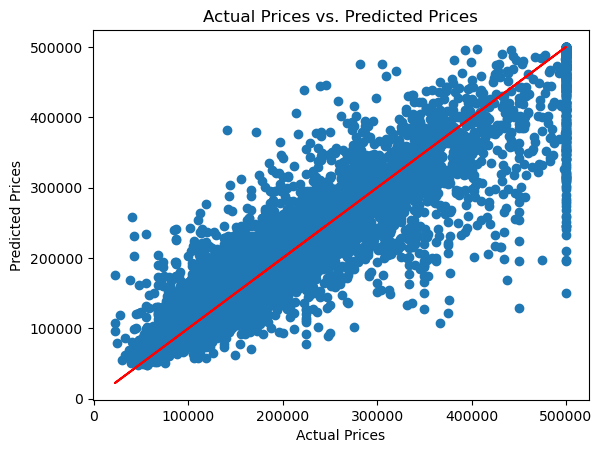

In [94]:
# visulization
plt.scatter(y_test, rf.predict(X_test_ss))
plt.plot(y_test, y_test, 'red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()